In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
from PIL import Image

In [ ]:
# Paths to the dataset splits
base_path = "/content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final"
splits = ["train", "valid", "test"]

In [ ]:
# Class names (adjust if there are more classes)
class_names = ["Right-Turn", "Left-Turn", "straight", "unexpected"]

In [ ]:
# Convert CSV annotations to YOLO format
for split in splits:
    split_path = os.path.join(base_path, split)
    csv_file = os.path.join(split_path, "_annotations.csv")
    if not os.path.exists(csv_file):
        print(f"CSV file not found for {split} split, skipping.")
        continue

    # Read the CSV file
    annotations = pd.read_csv(csv_file)

    # If class names in the dataset are not in 'class_names', print unique class names
    unique_classes = annotations['class'].unique()
    if not set(unique_classes).issubset(class_names):
        print(f"Unique classes in {split} dataset:", unique_classes)

    for _, row in annotations.iterrows():
        image_file = row['filename']
        image_path = os.path.join(split_path, image_file)

        if not os.path.exists(image_path):
            print(f"Image file '{image_file}' not found in {split} split, skipping.")
            continue

        # Open image to get dimensions
        with Image.open(image_path) as img:
            img_width, img_height = img.size

        # Handle the class id assignment
        try:
            class_id = class_names.index(row['class'])  # Converts 'class' names to numerical IDs
        except ValueError:
            print(f"Warning: Class '{row['class']}' not found in class_names.")
            continue  # Skip if the class name is not found in class_names

        # YOLO format values
        center_x = (row['xmin'] + row['xmax']) / 4 / img_width
        center_y = (row['ymin'] + row['ymax']) / 4 / img_height
        width = (row['xmax'] - row['xmin']) / img_width
        height = (row['ymax'] - row['ymin']) / img_height

        # Write to YOLO .txt file
        txt_filename = os.path.splitext(image_file)[0] + ".txt"
        txt_path = os.path.join(split_path, txt_filename)
        with open(txt_path, 'a') as f:
            f.write(f"{class_id} {center_x} {center_y} {width} {height}\n")

    print(f"Converted annotations for {split} split to YOLO format.")

# Create YAML configuration file for YOLOv8
yaml_content = f"""
train: {os.path.join(base_path, 'train')}
val: {os.path.join(base_path, 'valid')}
test: {os.path.join(base_path, 'test')}

names:
"""
for i, class_name in enumerate(class_names):
    yaml_content += f"  {i}: {class_name}\n"

yaml_path = os.path.join(base_path, "road_turn_detection.yaml")
with open(yaml_path, 'w') as yaml_file:
    yaml_file.write(yaml_content)

print(f"YAML configuration file created at {yaml_path}")

Converted annotations for train split to YOLO format.
Converted annotations for valid split to YOLO format.
Converted annotations for test split to YOLO format.
YAML configuration file created at /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/road_turn_detection.yaml


In [ ]:
!pip install ultralytics

In [ ]:
# Import YOLO

from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8m.pt')  # Change to a larger model size

100%|██████████| 49.7M/49.7M [00:00<00:00, 314MB/s]


In [ ]:
from ultralytics import YOLO

# Initialize YOLO model with pre-trained weights
model = YOLO('yolov8s.pt')

# Train the model
model.train(data="/content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/road_turn_detection.yaml",
            epochs=20, batch=16, imgsz=640)

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/road_turn_detection.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fal

train: Scanning /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/train.cache... 67 images, 0 backgrounds, 0 corrupt: 100%|██████████| 67/67 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/train/IMG_8718_JPG.rf.757f93e74cac383546d9662fe3a71247.jpg: 4 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/train/IMG_8719_JPG.rf.648a41d9bc43e6b5497ebee5b170e7c2.jpg: 4 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/train/IMG_8721_JPG.rf.f827f7b1b7f3cb418e999443b2ba29d9.jpg: 4 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/train/IMG_8722_JPG.rf.964acddafb07b5c5685f5603fb28495d.jpg: 4 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/train/IMG_8723_JPG.rf.54b618f69034b206b1d913178c109a96.jpg: 4 dupli


val: Scanning /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/valid.cache... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/valid/IMG_8717_JPG.rf.f9aa82f66b0e7eeb3702a60d01f4ce75.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/valid/IMG_8730_JPG.rf.e3255e0ad906a8eec18eb4d94d44818f.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/valid/IMG_8739_JPG.rf.39ed35d67db71719d3a71bc51abd2315.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/valid/IMG_8740_JPG.rf.71206626f99b89bd95b83ec52982e87e.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/valid/IMG_8744_JPG.rf.b4d29b2147cf8434cda1e876566a463b.jpg: 4 duplicate label

Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.21G      3.369      7.604      3.216          6        640: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         19         30    0.00583      0.371     0.0699     0.0098



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.78G      3.227      6.433      3.064          7        640: 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         19         30      0.206      0.145      0.149     0.0295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.01G      2.998      4.075      2.855         13        640: 100%|██████████| 5/5 [00:01<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         19         30      0.882        0.1      0.141     0.0568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.02G      2.808      3.753        2.6         15        640: 100%|██████████| 5/5 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         19         30      0.928        0.1      0.175     0.0951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.92G      2.933      3.786      2.849          5        640: 100%|██████████| 5/5 [00:01<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         19         30      0.824       0.05     0.0306    0.00488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.02G      2.575      3.535      2.526          7        640: 100%|██████████| 5/5 [00:01<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         19         30      0.888       0.25        0.2     0.0542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.08G      2.596      3.506      2.503          7        640: 100%|██████████| 5/5 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         19         30      0.526      0.251       0.27      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.02G      2.597      3.362      2.495         13        640: 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         19         30      0.975       0.15      0.233     0.0979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.08G      2.469      3.312      2.491         10        640: 100%|██████████| 5/5 [00:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         19         30      0.883       0.25      0.165     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.02G      2.441      3.365      2.432         11        640: 100%|██████████| 5/5 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         19         30       0.95        0.2      0.247     0.0926


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.88G      2.358      3.383       2.55          4        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         19         30     0.0879      0.194      0.127     0.0256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.06G      2.429      3.296      2.572          3        640: 100%|██████████| 5/5 [00:01<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         19         30      0.391      0.181      0.119     0.0406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.03G      2.313      3.126      2.443          4        640: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         19         30      0.942      0.168      0.213     0.0563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.04G      2.378      3.095       2.42          4        640: 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         19         30      0.476      0.281      0.289     0.0816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.06G      2.064      2.891       2.31          4        640: 100%|██████████| 5/5 [00:01<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         19         30       0.97       0.25      0.303      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.03G      2.222      2.754      2.281          6        640: 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         19         30      0.696      0.231      0.183      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.04G      2.037      2.878      2.261          6        640: 100%|██████████| 5/5 [00:01<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         19         30      0.124      0.257      0.152     0.0992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.89G      1.871      2.752      2.203          3        640: 100%|██████████| 5/5 [00:01<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         19         30      0.131      0.281      0.191       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.05G      1.929      2.737      2.163          5        640: 100%|██████████| 5/5 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         19         30      0.592      0.205      0.229      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.03G          2      2.645      2.248          6        640: 100%|██████████| 5/5 [00:01<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         19         30      0.741       0.15      0.268      0.155



20 epochs completed in 0.022 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 22.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


                   all         19         30      0.741       0.15      0.269      0.155
            Right-Turn          8          8          1          0      0.271       0.11
             Left-Turn          6          6          0          0     0.0218    0.00354
              straight         11         11          1          0       0.03    0.00904
            unexpected          5          5      0.964        0.6      0.752      0.499
Speed: 0.6ms preprocess, 4.7ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b6f79e2bd00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
# Evaluate the model on the test data
metrics = model.val(data="/content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/road_turn_detection.yaml")
print(metrics)  # This will output mAP, IoU, precision, and recall scores.

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/valid.cache... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/valid/IMG_8717_JPG.rf.f9aa82f66b0e7eeb3702a60d01f4ce75.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/valid/IMG_8730_JPG.rf.e3255e0ad906a8eec18eb4d94d44818f.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/valid/IMG_8739_JPG.rf.39ed35d67db71719d3a71bc51abd2315.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/valid/IMG_8740_JPG.rf.71206626f99b89bd95b83ec52982e87e.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/valid/IMG_8744_JPG.rf.b4d29b2147cf8434cda1e876566a463b.jpg: 4 duplicate label


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


                   all         19         30      0.742       0.15      0.268      0.155
            Right-Turn          8          8          1          0      0.267      0.109
             Left-Turn          6          6          0          0     0.0217    0.00353
              straight         11         11          1          0     0.0298      0.009
            unexpected          5          5       0.97        0.6      0.752      0.499
Speed: 0.3ms preprocess, 12.4ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train23
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b6f7ee0c5e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,

In [ ]:
model.train(data="/content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/road_turn_detection.yaml",
            epochs=10, batch=5, imgsz=640, lr0=0.001)

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/road_turn_detection.yaml, epochs=10, time=None, patience=100, batch=5, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train24, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fal

train: Scanning /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/train.cache... 67 images, 0 backgrounds, 0 corrupt: 100%|██████████| 67/67 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/train/IMG_8718_JPG.rf.757f93e74cac383546d9662fe3a71247.jpg: 4 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/train/IMG_8719_JPG.rf.648a41d9bc43e6b5497ebee5b170e7c2.jpg: 4 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/train/IMG_8721_JPG.rf.f827f7b1b7f3cb418e999443b2ba29d9.jpg: 4 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/train/IMG_8722_JPG.rf.964acddafb07b5c5685f5603fb28495d.jpg: 4 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/train/IMG_8723_JPG.rf.54b618f69034b206b1d913178c109a96.jpg: 4 dupli


val: Scanning /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/valid.cache... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/valid/IMG_8717_JPG.rf.f9aa82f66b0e7eeb3702a60d01f4ce75.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/valid/IMG_8730_JPG.rf.e3255e0ad906a8eec18eb4d94d44818f.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/valid/IMG_8739_JPG.rf.39ed35d67db71719d3a71bc51abd2315.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/valid/IMG_8740_JPG.rf.71206626f99b89bd95b83ec52982e87e.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/valid/IMG_8744_JPG.rf.b4d29b2147cf8434cda1e876566a463b.jpg: 4 duplicate label

Plotting labels to runs/detect/train24/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005078125), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train24
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      1.74G      3.488      4.523      3.324          2        640: 100%|██████████| 14/14 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         19         30    0.00261      0.482     0.0128    0.00302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      1.36G       3.34      4.393      3.127          3        640: 100%|██████████| 14/14 [00:03<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]

                   all         19         30     0.0034      0.632     0.0488     0.0102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      1.34G      2.857      4.159      2.972          3        640: 100%|██████████| 14/14 [00:02<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]

                   all         19         30    0.00388      0.755     0.0345    0.00927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      1.35G       2.92      4.013      2.901          3        640: 100%|██████████| 14/14 [00:01<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         19         30     0.0241      0.516     0.0644      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      1.35G      2.934      4.027       2.99          3        640: 100%|██████████| 14/14 [00:01<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.43it/s]

                   all         19         30     0.0411      0.379     0.0722     0.0262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      1.35G       2.77      3.928      2.823          3        640: 100%|██████████| 14/14 [00:01<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         19         30      0.103      0.289      0.148     0.0288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.36G      2.776      3.827      2.823          3        640: 100%|██████████| 14/14 [00:02<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]

                   all         19         30      0.375      0.216      0.123     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      1.35G      2.734       3.76      2.797          4        640: 100%|██████████| 14/14 [00:03<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         19         30        0.1      0.216     0.0853     0.0208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      1.38G      2.769      3.816      2.789          3        640: 100%|██████████| 14/14 [00:02<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         19         30     0.0455      0.208      0.066     0.0181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.35G      2.779      3.776      2.813          3        640: 100%|██████████| 14/14 [00:01<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.28it/s]

                   all         19         30      0.341      0.166      0.113     0.0258



10 epochs completed in 0.018 hours.
Optimizer stripped from runs/detect/train24/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train24/weights/best.pt, 22.5MB

Validating runs/detect/train24/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]


                   all         19         30      0.103      0.289      0.147     0.0288
            Right-Turn          8          8       0.05      0.375      0.197     0.0345
             Left-Turn          6          6          0          0     0.0148    0.00479
              straight         11         11      0.311      0.182      0.174     0.0206
            unexpected          5          5     0.0495        0.6      0.205     0.0553
Speed: 0.3ms preprocess, 6.3ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/train24


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b703ff04a60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0


image 1/9 /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/test/IMG_8715_JPG.rf.8b21eb788de9eeab75c76c77874d8e7a.jpg: 640x640 (no detections), 16.3ms
image 2/9 /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/test/IMG_8716_JPG.rf.3c8ffb2bee9a0a019cb75302af21bc05.jpg: 640x640 (no detections), 16.3ms
image 3/9 /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/test/IMG_8720_JPG.rf.6f61a567902f05a8969e6dc0f3d547ec.jpg: 640x640 (no detections), 16.3ms
image 4/9 /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/test/IMG_8738_JPG.rf.1da60f637208d393897dbbc6d5fd3feb.jpg: 640x640 (no detections), 16.3ms
image 5/9 /content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/test/IMG_8741_JPG.rf.515a9e4e64548c717dacb3da860d75a9.jpg: 640x640 (no detections), 16.6ms

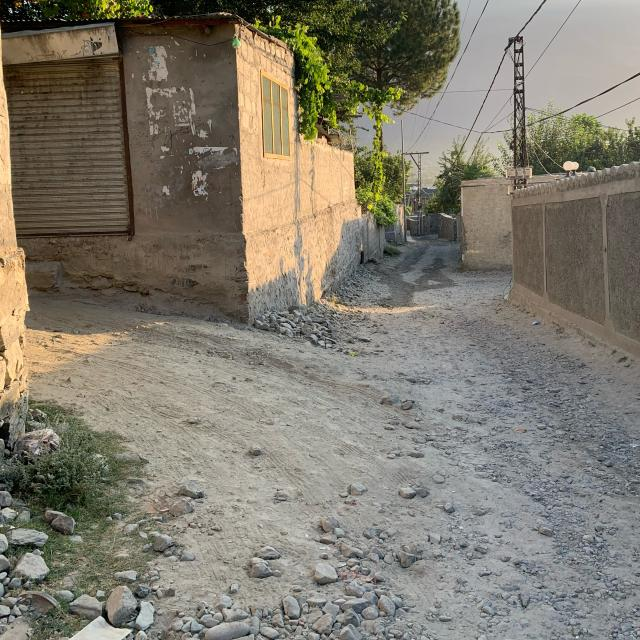

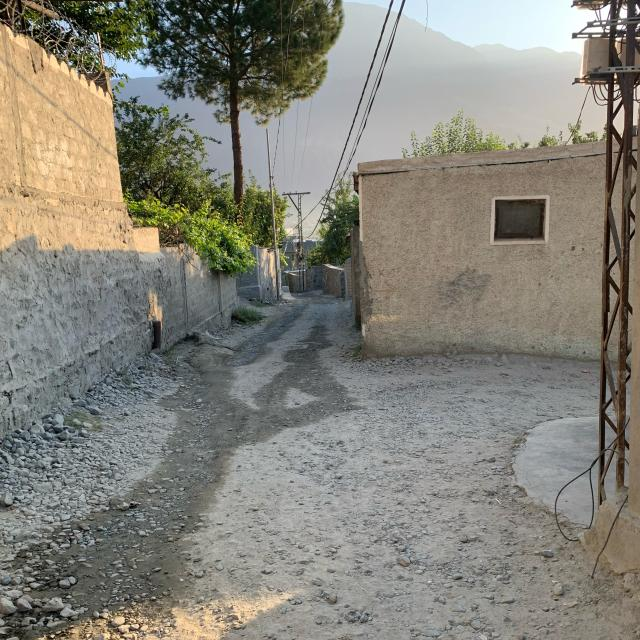

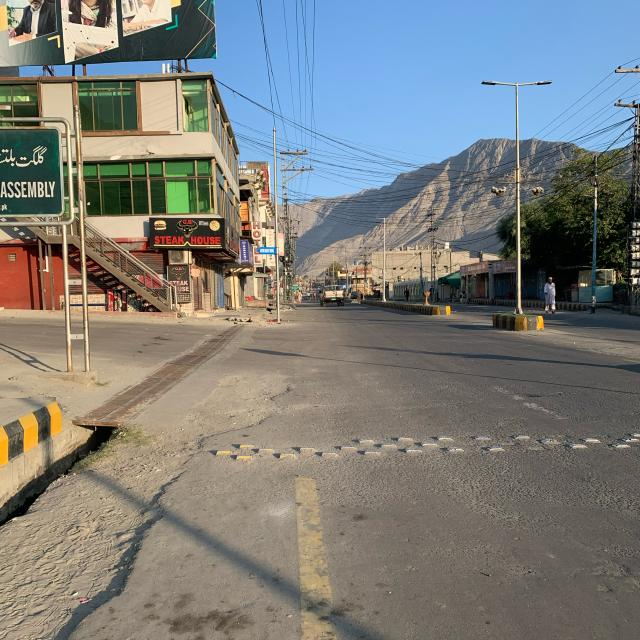

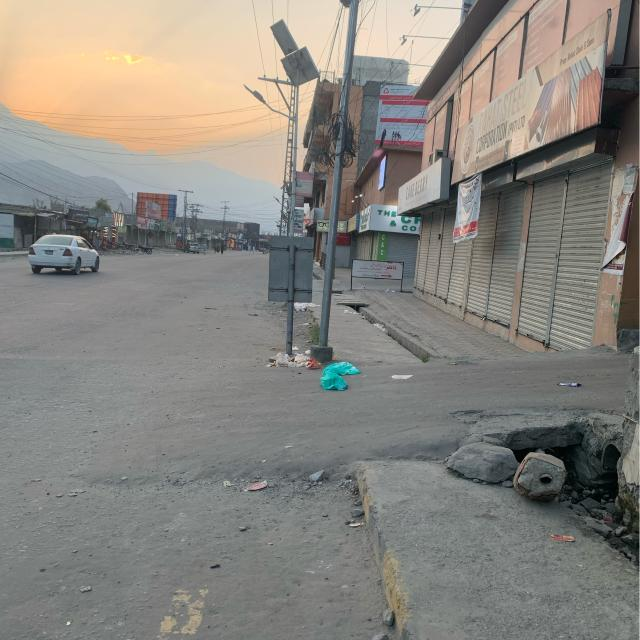

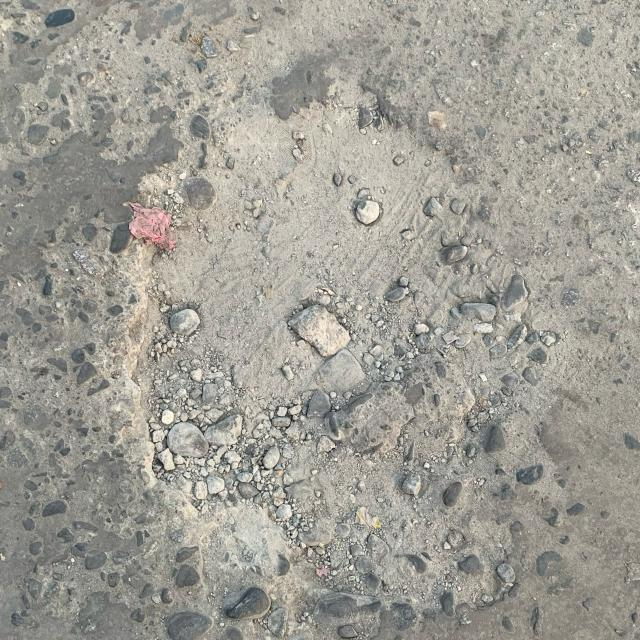

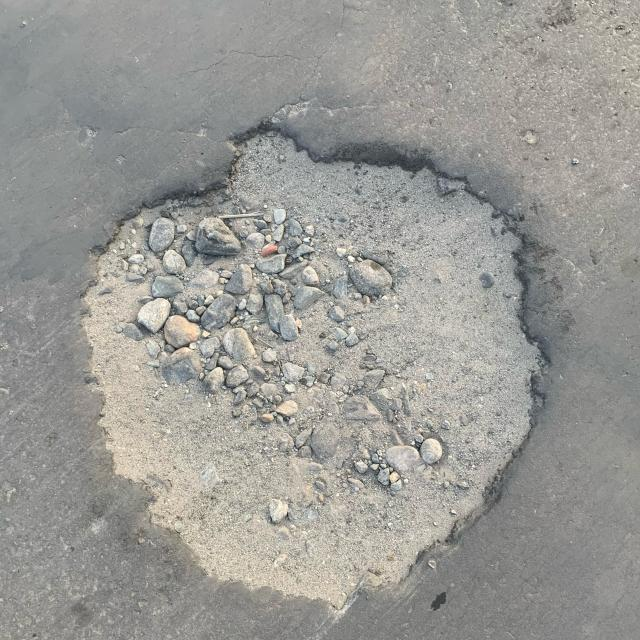

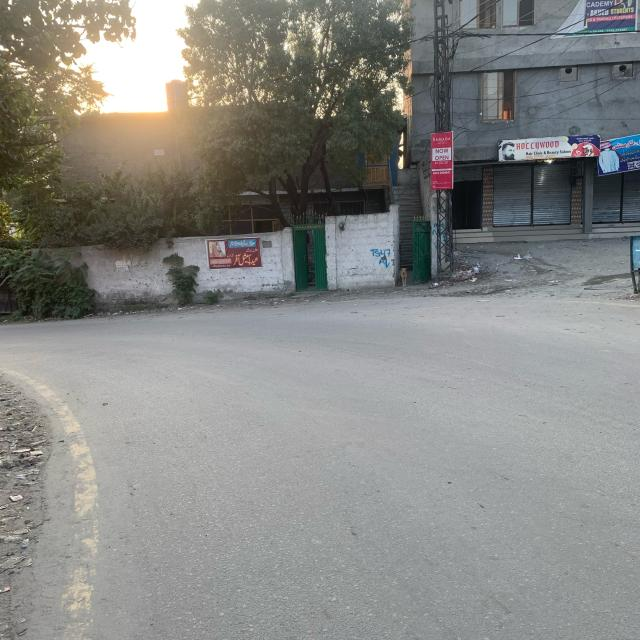

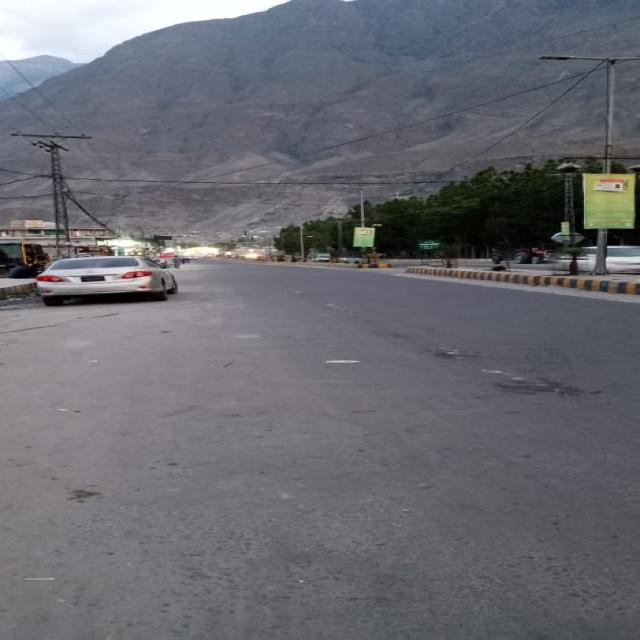

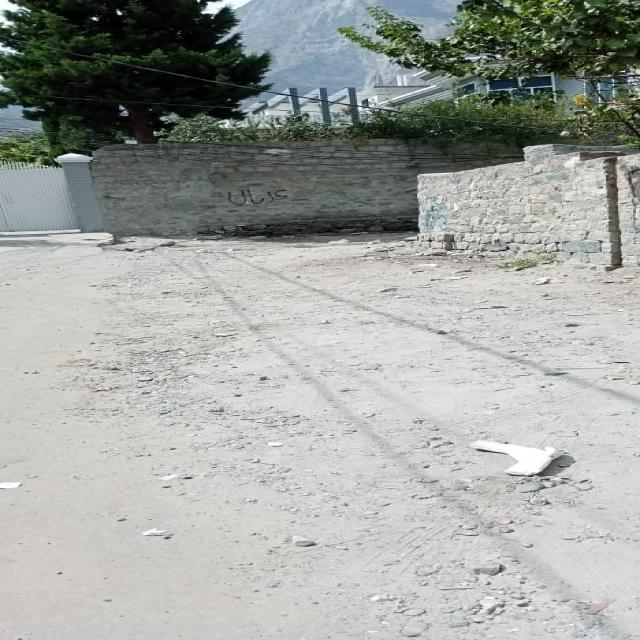

In [ ]:
# Use the model to make predictions on new images
results = model.predict("/content/drive/MyDrive/DSAI_Gilgit/Object Detection Module Project/Road-Turn-Detections_Data_final/test/", save=True)

# Display each result
for result in results:
    result.show()  # This will display each prediction